In [1]:
from pylab import *
accel_data = loadtxt('accelerometer.csv', delimiter=',',skiprows=1)
#moon_data = loadtxt('data.txt')

/home/jgoppert/anaconda3/envs/aae301/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


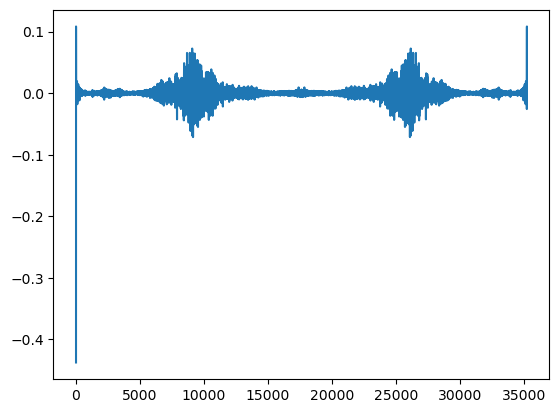

In [3]:
plot(ak)

In [2]:
time = accel_data[:,0]
accel = accel_data[:,1]

ak = ifft(accel)
power = abs(ak)**2
dt = mean(diff(time))
nu = len(time)
freq = fftfreq(nu, dt)

index10 = 0
a = 0

while a != 10:
    index10+=1
    a = freq[index10]//1

b = 0
index80 = 0

while b != 80:
    index80+=1
    b = freq[index80]//1

Dominant Frequency: 51.95950748918213 Hz


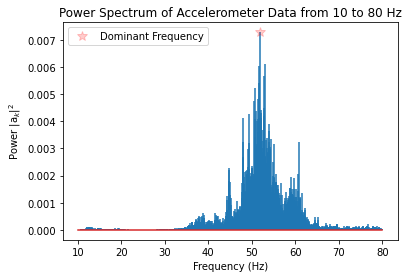

In [6]:
figure()
stem(freq[index10:index80],power[index10:index80], markerfmt = ' ')
title("Power Spectrum of Accelerometer Data from 10 to 80 Hz")
ylabel("Power |a$_k$|$^2$")
xlabel("Frequency (Hz)")

indexMax = index10 + argmax(power[index10:index80])
plot(freq[indexMax], power[indexMax], 'r*', markersize=10, alpha=0.2, label='Dominant Frequency')
legend()

print('Dominant Frequency:', freq[indexMax], 'Hz')

In [15]:
(1/dt)/nu

0.00568298233503031

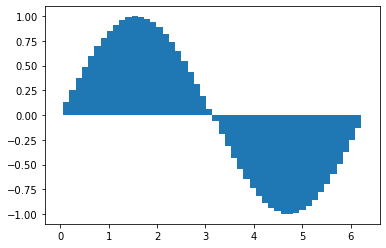

In [41]:
t = np.linspace(0, 2*np.pi)
y = sin(t)
plt.fill_between(t, y, step='mid')

<BarContainer object of 50 artists>

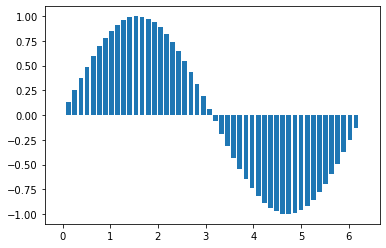

In [35]:
t = np.linspace(0, 2*np.pi)
y = sin(t)
plt.bar(t, y, width=0.1)

(10.0, 80.0, 0.0, 0.008)

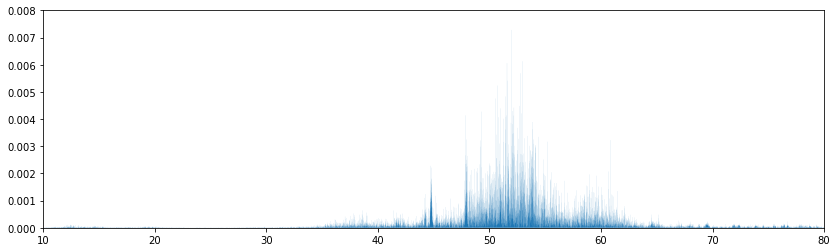

In [45]:
plt.figure(figsize=(14, 4))
plt.fill_between(freq[index10:index80],power[index10:index80], step='pre')
axis([10, 80, 0, 0.008])

<StemContainer object of 3 artists>

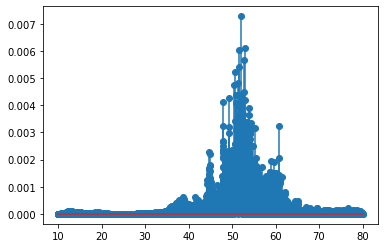

In [50]:
plt.stem(freq[index10:index80],power[index10:index80])

### Problem 2b

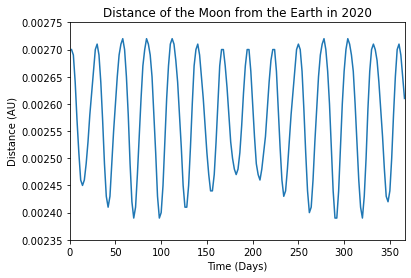

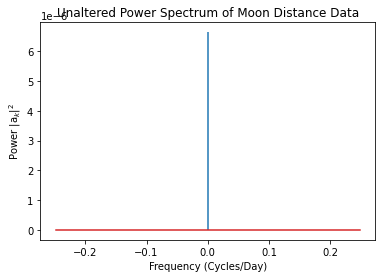

In [6]:
days = moon_data[:,0]
dist = moon_data[:,1]

ak_moon = ifft(dist)
power_moon = abs(ak_moon)**2
dt_moon = mean(diff(days))
nu_moon = len(days)
freq_moon = fftfreq(nu_moon, dt_moon)

figure()
plot(days,dist)
axis([0, 366, 0.00235, 0.00275])
title("Distance of the Moon from the Earth in 2020")
ylabel("Distance (AU)")
xlabel("Time (Days)")

figure()
stem(freq_moon,power_moon, markerfmt = ' ')
title("Unaltered Power Spectrum of Moon Distance Data")
ylabel("Power |a$_k$|$^2$")
xlabel("Frequency (Cycles/Day)");

Dominant Frequency: 0.03551912568306011 Cycles/Day


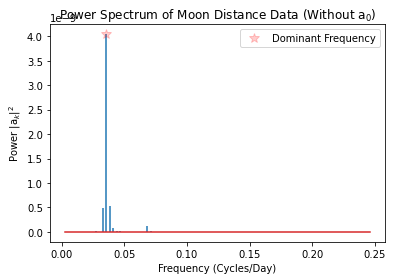

In [7]:
figure()
stem(freq_moon[1:nu_moon//2],power_moon[1:nu_moon//2], markerfmt = ' ')
title("Power Spectrum of Moon Distance Data (Without a$_0$)")
ylabel("Power |a$_k$|$^2$")
xlabel("Frequency (Cycles/Day)")

indexMax_moon = 1 + argmax(power_moon[1:nu//2])
plot(freq_moon[indexMax_moon], power_moon[indexMax_moon], 'r*', markersize=10, alpha=0.2, label='Dominant Frequency')
legend()

print('Dominant Frequency:', freq_moon[indexMax_moon], 'Cycles/Day')